In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data
data = pd.read_csv("train.csv")

# Split into train 80% and test set 20%
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

# Split labels from pixels
train_labels = np.array(train["label"], dtype=float)
test_labels = np.array(test["label"], dtype=float)
train = np.array(train.drop(columns=["label"]))
test = np.array(test.drop(columns=["label"]))

# Scale the data
train = train / 255
test = test / 255

In [3]:
print("Shape of train set: ", train.shape)
print("Shape of test set: ", test.shape)
print("Shape of train labels: ", train_labels.shape)
print("Shape of test labels: ", test_labels.shape)

Shape of train set:  (33708, 784)
Shape of test set:  (8292, 784)
Shape of train labels:  (33708,)
Shape of test labels:  (8292,)


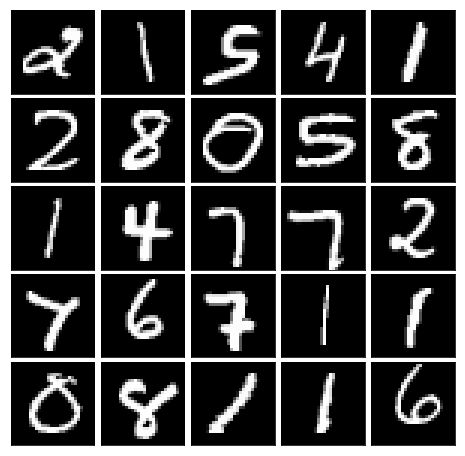

In [4]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1, 26):
    ax = fig.add_subplot(5, 5, i)
    idx = np.random.randint(train.shape[0])
    plt.imshow(np.reshape(train[idx, :] , [28, 28]), cmap="gray")
    plt.xticks([])
    plt.yticks([])

In [5]:
# Source: https://www.kaggle.com/mjwheele/mnist-number-neural-network

# Create model
model = keras.models.Sequential([
    keras.layers.Dense(784),                            

    keras.layers.Dense(128, activation=tf.nn.relu),     
                                                        
    keras.layers.Dense(10, activation=tf.nn.softmax)    
])

In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit model to train data
model.fit(train, train_labels, epochs=5)

Epoch 1/5
33708/33708 [==============================] - 17s 506us/step - loss: 0.2671 - acc: 0.9203
Epoch 2/5
33708/33708 [==============================] - 18s 530us/step - loss: 0.1483 - acc: 0.9550
Epoch 3/5
33708/33708 [==============================] - 17s 517us/step - loss: 0.1229 - acc: 0.9616
Epoch 4/5
33708/33708 [==============================] - 17s 514us/step - loss: 0.1016 - acc: 0.9686
Epoch 5/5
33708/33708 [==============================] - 19s 553us/step - loss: 0.0833 - acc: 0.9742


In [8]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(test, test_labels)

8292/8292 [==============================] - 1s 115us/step


In [9]:
print("The model has %.2f%% overall accuracy." % (100*test_acc))

The model has 96.50% overall accuracy.
